## [Feature scaling + One hot encoding] for Mixed-Type variables

In [1]:
import os
import mglearn
import pandas as pd
import numpy as np

adult_path = os.path.join(mglearn.datasets.DATA_PATH, "adult.data")
data = pd.read_csv(
    adult_path, header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])

# to make the problem simple, select some variables
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
             'occupation', 'income']]

In [2]:
# Mixed-type variables. 
data

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K
...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Female,38,Tech-support,<=50K
32557,40,Private,HS-grad,Male,40,Machine-op-inspct,>50K
32558,58,Private,HS-grad,Female,40,Adm-clerical,<=50K
32559,22,Private,HS-grad,Male,20,Adm-clerical,<=50K


In [3]:
# you can check the distribution of categories in each categorical variable.
print(data.workclass.value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64


In [4]:
print(data.occupation.value_counts())

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64


We want to apply the following preprocessing : 
- Standard scaler for numerical variable
- One hot encoding for categorical variable   


Then, apply Logistic regression to predict the 'income'

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data.drop("income", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, data.income, random_state=0)

In [11]:
# Divide X_train and X_test into numerical and categorical variables, respectively.
X_train_cat = X_train[['workclass','education','gender','occupation']]
X_train_num = X_train[['age','hours-per-week']]

X_test_cat = X_test[['workclass','education','gender','occupation']]
X_test_num = X_test[['age','hours-per-week']]

In [12]:
# For X_train_cat and X_test_cat, apply onehotencoding
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
ohe.fit(X_train_cat)

X_train_cat_ohe = ohe.transform(X_train_cat)
X_test_cat_ohe = ohe.transform(X_test_cat)

In [14]:
# For X_train_num and X_test_num, apply standardscaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

In [15]:
# concatenate them agin into X_train and X_test. 
X_train_trans = np.concatenate([X_train_cat_ohe, X_train_num_scaled], axis=1)
X_test_trans = np.concatenate([X_test_cat_ohe, X_test_num_scaled], axis=1)

In [15]:
# train logistic regression model and check the accuracy for test set
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_trans, y_train)

y_test_hat = logreg.predict(X_test_trans)

print("Accuracy on testing set: ", accuracy_score(y_test, y_test_hat))

Accuracy on testing set:  0.8091143594153053


- The ColumnTransformer makes the same task a bit simpler. 
- How to use it can be intuitively known from the code below. Just check it out. 

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data.drop("income", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, data.income, random_state=0)

#*****************
ct = ColumnTransformer(
    [("scaling", StandardScaler(), ['age', 'hours-per-week']),
     ("onehot", OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation'])])

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
#*****************

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_trans, y_train)

X_test_trans = ct.transform(X_test)
y_test_hat = logreg.predict(X_test_trans)

print("Accuracy on testing set: ", accuracy_score(y_test, y_test_hat))

Accuracy on testing set:  0.808991524382754


## Simulated example for bias-variance decompostion

Let's calculate the bias and variance ourselves.

In [18]:
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [19]:
# x_test: densely distributed data points between 0 and 2
x_test= np.linspace(0,2,1000) # evenly spaced samples between start and stop)

In [22]:
# True function we don't really know
def true_function(x):
    return np.sin(np.pi * x)

In [23]:
y_true = true_function(x_test) # we don't know either. 

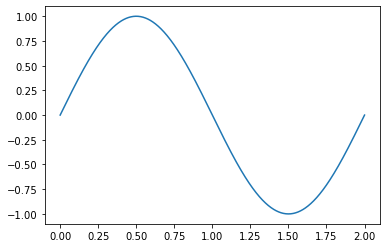

In [24]:
# let't just see what it looks like. 
plt.plot(x_test,y_true)

[0.17077507 0.90599686]
[0.51113579 0.29104562]


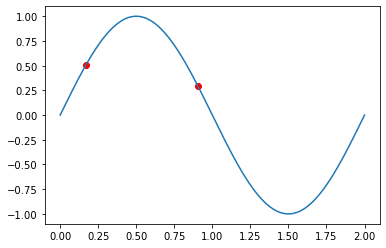

In [28]:
# sample just 2 data points for training data
x_train = np.random.uniform(0,2,2)
y_train = true_function(x_train)
print(x_train)
print(y_train)
plt.plot(x_test,y_true)
plt.scatter(x_train, y_train, c='r')

#### H0: Constant function

In [29]:
# fit with constant function 
def constant_function(x_train, y_train, x_test): # it outputs average of y_train regardless of the value of x_test
    average_of_train_data = np.mean(y_train)    
    return np.repeat(average_of_train_data, len(x_test))

# with this constant function, we can make prediction on x_test.
y_test = constant_function(x_train, y_train, x_test)

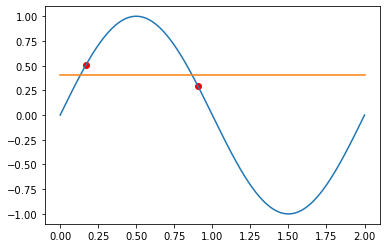

In [30]:
plt.plot(x_test, y_true)
plt.plot(x_test, y_test)
plt.scatter(x_train, y_train, c='r')
# orange line is a trained model using H0

#### H1: Linear regression

In [31]:
# fit with linear regression (line passing through the two training data points)
reg = LinearRegression().fit(x_train.reshape(-1,1), y_train)
y_test = reg.predict(x_test.reshape(-1,1))

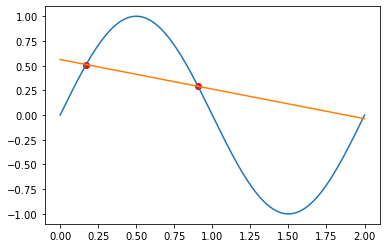

In [32]:
plt.plot(x_test, y_true)
plt.plot(x_test, y_test)
plt.scatter(x_train, y_train, c='r')
# orange line is a trained model using H1

#### Repeat for 1000 times and calcualte the bias and variance yourself. (using H1)

In [49]:
y_test_list = []
for i in range(1000):
    x_train = np.random.uniform(0,2,1000000)
    y_train = true_function(x_train) #sampling 

    reg = LinearRegression().fit(x_train.reshape(-1,1), y_train) # training
    y_test = reg.predict(x_test.reshape(-1,1)) # test
   
#     y_test = constant_function(x_train, y_train, x_test) # training and test
    
    y_test_list.append(y_test)
y_test_total = np.stack(y_test_list)

In [41]:
y_test_total.shape

(1000, 1000)

In [42]:
y_test_avg = y_test_total.mean(axis=0)

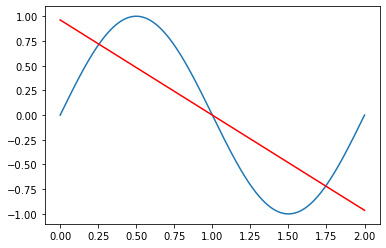

In [43]:
plt.plot(x_test,y_true)
plt.plot(x_test, y_test_avg, c='r')

In [44]:
bias = np.mean((y_test_avg - y_true)**2)
bias

0.19679290587830336

In [45]:
variance = np.mean (np.var(y_test_total, axis=0))
variance

0.004376321932848734

In [47]:
error = np.mean((y_test_total - y_true)**2)
error

0.20116922781115215

In [48]:
bias + variance 

0.2011692278111521

- If the model is too simple, the bias is high.
- The more complex the model, the higher the variance.
- As the amount of training data increases, variance can be lowered.


- **This is main reason why we need large amount of training data to achieve a good model**